In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [129]:
df = pd.read_csv('./vars.txt', sep='\s+', low_memory=False)
df = df.replace('x', 0).astype(int)

df_q = pd.read_csv('./q_fit_10bits_no_drop.txt', header=None)
df_q[1] = np.arange(0, 1023)
df_q.columns = ['q_measured', 'i_ref']

df_q = df_q.iloc[: , [1, 0]]

df_q

,i_ref,q_measured
0,0,22
1,1,22
2,2,22
3,3,22
4,4,22
...,...,...
1018,1018,300
1019,1019,303
1020,1020,307
1021,1021,310


In [130]:
df_r = df[df['ready'] == 1]

In [131]:
df_r

,time,clk,rst,start,enable,i_ref,q_measured,ready,q_desired,converged
697,697,1,0,1,1,511,56,1,26,0
698,698,0,0,1,1,511,56,1,26,0
1131,1131,1,0,1,1,255,35,1,26,0
1132,1132,0,0,1,1,255,35,1,26,0
1493,1493,1,0,1,1,127,29,1,26,0
...,...,...,...,...,...,...,...,...,...,...
148966,148966,0,0,1,1,1015,290,1,314,0
152615,152615,1,0,1,1,1019,303,1,314,0
152616,152616,0,0,1,1,1019,303,1,314,0
156349,156349,1,0,1,1,1021,310,1,314,0


In [132]:
df_r

,time,clk,rst,start,enable,i_ref,q_measured,ready,q_desired,converged
697,697,1,0,1,1,511,56,1,26,0
698,698,0,0,1,1,511,56,1,26,0
1131,1131,1,0,1,1,255,35,1,26,0
1132,1132,0,0,1,1,255,35,1,26,0
1493,1493,1,0,1,1,127,29,1,26,0
...,...,...,...,...,...,...,...,...,...,...
148966,148966,0,0,1,1,1015,290,1,314,0
152615,152615,1,0,1,1,1019,303,1,314,0
152616,152616,0,0,1,1,1019,303,1,314,0
156349,156349,1,0,1,1,1021,310,1,314,0


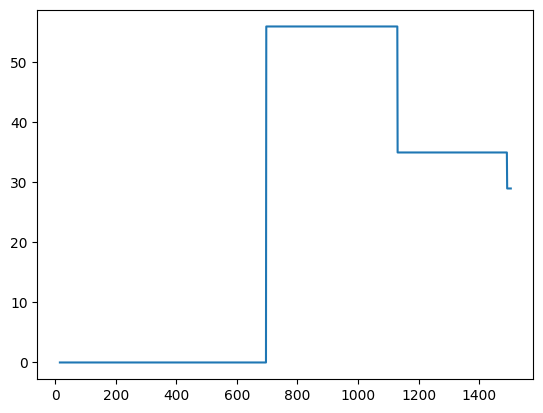

In [142]:
grouped = df.groupby('q_desired')

dfs = [g for _, g in grouped]

f, ax = plt.subplots()

ax.plot(dfs[1]['time'], dfs[1]['q_measured'])


# for i, df in enumerate(dfs):
#     df = df.reset_index()
#     ax.plot(df.index.values, df['q_measured'])



# dfs[][['time', 'q_measured']].plot(x='time')

[Text(0.5, 0, 'Time [ps]')]

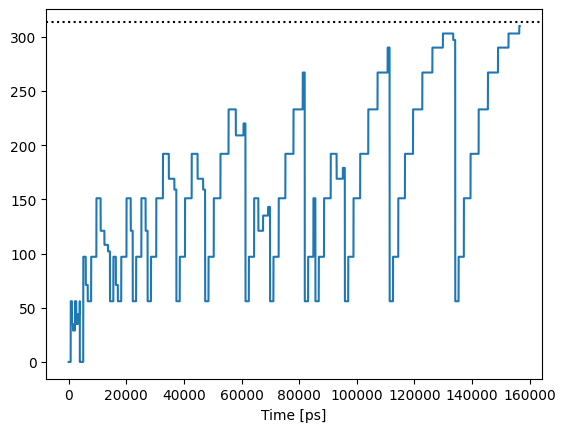

In [134]:
f, ax = plt.subplots()

ax.plot(df['time'], df['q_measured'])
ax.axhline(y=df['q_desired'].max(), linestyle=':', c='k')

ax.set(xlabel='Time [ps]')

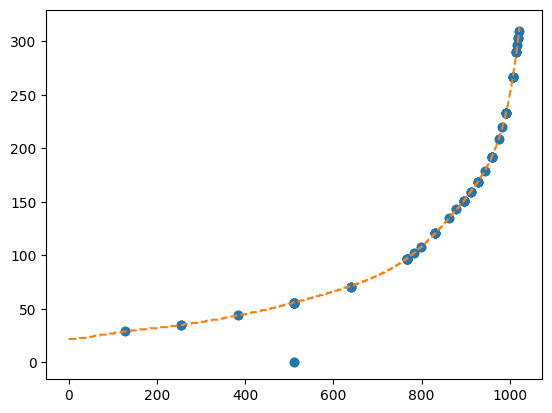

In [135]:

plt.plot(df_r['i_ref'], df_r['q_measured'], 'o')
plt.plot(df_q['i_ref'], df_q['q_measured'], '--')

In [136]:
df_r

,time,clk,rst,start,enable,i_ref,q_measured,ready,q_desired,converged
697,697,1,0,1,1,511,56,1,26,0
698,698,0,0,1,1,511,56,1,26,0
1131,1131,1,0,1,1,255,35,1,26,0
1132,1132,0,0,1,1,255,35,1,26,0
1493,1493,1,0,1,1,127,29,1,26,0
...,...,...,...,...,...,...,...,...,...,...
148966,148966,0,0,1,1,1015,290,1,314,0
152615,152615,1,0,1,1,1019,303,1,314,0
152616,152616,0,0,1,1,1019,303,1,314,0
156349,156349,1,0,1,1,1021,310,1,314,0


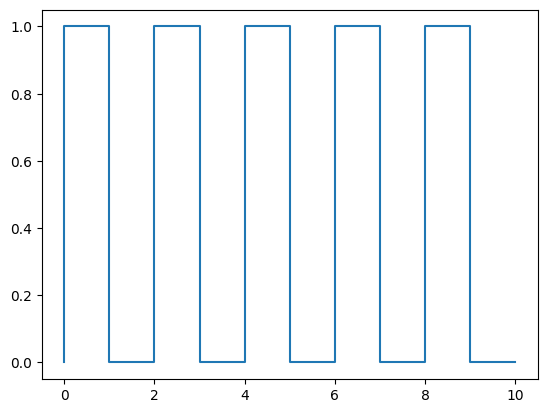

In [137]:
time = df.loc[:10, 'time']
clk = df.loc[:10, 'clk']

plt.step(time, clk)